####  6.1 Reading and Writing Data in Text Format

In [22]:
import pandas as pd
import numpy as np

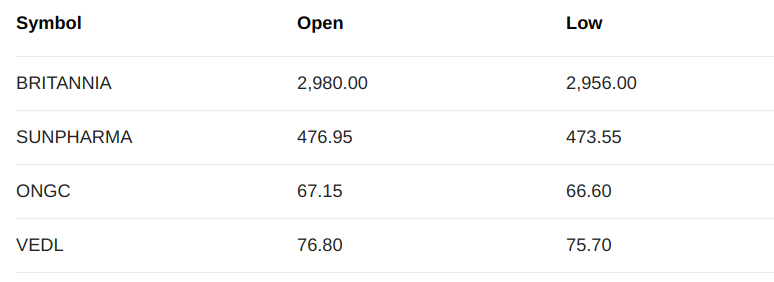

Copied above text from web results!!

In [4]:
pd.read_clipboard()

,Symbol,Open,Low
0,BRITANNIA,"2,980.00","2,956.00"
1,SUNPHARMA,476.95,473.55
2,ONGC,67.15,66.60
3,VEDL,76.80,75.70


reading tables from web pages

In [17]:
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)")

In [69]:
[len(each) for each in data]

[1, 470, 232, 234, 12]

In [60]:
c_population = data[1].dropna()
real_cols = c_population.iloc[0]
c_population.columns = real_cols
c_population = c_population[1:]
c_population.reset_index(drop=True, inplace=True)
c_population.head()

235,Country or area,UN continentalregion[4],UN statisticalregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [68]:
c_population.index.name='S.No.'
c_population.columns.name=''
c_population.head()

,Country or area,UN continentalregion[4],UN statisticalregion[4],Population(1 July 2018),Population(1 July 2019),Change
S.No.,,,,,,
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


**read_csv()** alone has more than 50 parameters because of complexity of real world data

Handling different types of data in files:

In [72]:
! cat ../examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [73]:
# comma seperated
df = pd.read_csv('../examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [75]:
# reading with read_table function
# need to explicitly define seperator
df = pd.read_table('../examples/ex1.csv', sep=',')
df

/home/seed9six/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


File without header

In [76]:
! cat ../examples/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [78]:
# without headers
pd.read_csv('../examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [79]:
# with custom headers
pd.read_csv('../examples/ex2.csv',
            names='a, b, c, d, message'.split(', '))

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


using a column as index column

In [80]:
names = 'a, b, c, d, message'.split(', ')
pd.read_csv('../examples/ex2.csv',
           names = names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [81]:
pd.read_csv('../examples/ex2.csv',
           names = names, index_col=4)

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Creating hierarchical index from multple cols

In [82]:
! cat ../examples/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [85]:
parsed = pd.read_csv('../examples/csv_mindex.csv',
           index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

whitespace as seperator

In [87]:
list(open('../examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [88]:
# using regex
result = pd.read_table('../examples/ex3.txt', sep='\s+')
result

/home/seed9six/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Skipping specific rows while reading

In [90]:
! cat ../examples/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [91]:
pd.read_csv('../examples/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Handling missing values

In [92]:
! cat ../examples/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [93]:
result = pd.read_csv('../examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [94]:
# check which values are Null or NAN
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [96]:
# defining which strings to be considered as NAN
pd.read_csv('../examples/ex5.csv', na_values=['NULL', 'three'])

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,NaN,9,10,11.0,12,foo


Defining NA specific to columns

In [97]:
sentinels = {'message': ['foo', 'NA'],
            'something': ['two']}
pd.read_csv('../examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


##### Reading Text Files in Pieces

Helpful when processing large files

In [98]:
# change max rows to be displayed
pd.options.display.max_rows = 10

In [100]:
result = pd.read_csv('../examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [101]:
# reading first n rows
pd.read_csv('../examples/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


reading a file in pieces

In [107]:
chunker = pd.read_csv('../examples/ex6.csv', chunksize=1000)
chunker

In [108]:
for p in chunker:
    print(len(p))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [111]:
chunker = pd.read_csv('../examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for p in chunker:
    tot = tot.add(p['key'].value_counts(), fill_value=0)

In [120]:
len(tot)

36

In [112]:
tot[:20]

0    151.0
1    146.0
2    152.0
3    162.0
4    171.0
     ...  
F    335.0
G    308.0
H    330.0
I    327.0
J    337.0
Length: 20, dtype: float64

In [118]:
tot.index.unique()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
       'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

##### Writing Data to Text Format

In [124]:
data = pd.read_csv('../examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [125]:
# saving to csv
data.to_csv('out.csv')

In [126]:
# using other delimeters
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [127]:
# denote missing values with sentinel values
# na_rep = missing data representation
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [128]:
# disable row and column labels
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [131]:
# writing subset of columns
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c', 'd'])

a,b,c,d
1,2,3.0,4
5,6,,8
9,10,11.0,12


**to_csv()** with Series

In [132]:
dates = pd.date_range('1/1/2000', periods=7)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [134]:
ts = pd.Series(np.arange(7), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int64

In [135]:
ts.to_csv(sys.stdout)

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


/home/seed9six/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


##### Working with Delimited Formats

When manual processing is necessary

In [136]:
! cat ../examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [153]:
# built-in csv module
import csv
f = open('../examples/ex7.csv')
f

<_io.TextIOWrapper name='../examples/ex7.csv' mode='r' encoding='UTF-8'>

In [156]:
reader = csv.reader(f) # input is file object

In [157]:
reader # we need to iterate reader, yields tuple

In [158]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


going step-by-step for processing

In [159]:
with open('../examples/ex7.csv') as f:
    lines = list(csv.reader(f))
lines

[['a', 'b', 'c'], ['1', '2', '3'], ['1', '2', '3']]

In [160]:
# split into header and values
header, values = lines[0], lines[1:]

In [161]:
values

[['1', '2', '3'], ['1', '2', '3']]

In [162]:
# since values is already a list of list we can transpose it
list(zip(*values)) # example of transpose

[('1', '1'), ('2', '2'), ('3', '3')]

In [163]:
# creating a dictionary with key as column names
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [176]:
# now we can write this dictionary to a csv since double quotes
# are removed....
# for setting different options like dilimeter, quote character, we
# can use subclass csv.Dialect

class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ','
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

f = open('../examples/ex7.csv')

reader = csv.reader(f, dialect = my_dialect)

In [151]:
# check for more options of csv.Dialect:
np.info(csv.Dialect)

 Dialect()

Describe a CSV dialect.

This must be subclassed (see csv.excel).  Valid attributes are:
delimiter, quotechar, escapechar, doublequote, skipinitialspace,
lineterminator, quoting.


Methods:



In [177]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


-<br>
-
If files are more complex to process...
try regex re.split and string's split methods

In [179]:
# writing delimited files manually
# using csv.writer method
with open('my_data.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow('one, two, three'.split(', '))
    writer.writerow(list('123'))
    writer.writerow(list('456'))
    writer.writerow(list('789'))

In [180]:
! cat my_data.csv

one,two,three
1,2,3
4,5,6
7,8,9


##### JSON Data

Java Script Object Notation

In [183]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Germany", "Spain"],
"pets": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
            {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [184]:
# loading data from json string to python dict
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Germany', 'Spain'],
 'pets': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [185]:
# converting Json objects to pandas DataFrame
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


**pandas.read_json()**

In [186]:
! cat ../examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


Assuming each object in JSON represents a row

In [188]:
data = pd.read_json('../examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


Export from Pandas to JSON

In [189]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [190]:
# removing explicit index numbers
# there are many other options than records, use object interospection for more info
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [191]:
np.info(data.to_json)

 to_json(path_or_buf=None, orient=None, date_format=None, double_precision=10,
         force_ascii=True, date_unit='ms', default_handler=None, lines=False,
         compression='infer', index=True)

Convert the object to a JSON string.

Note NaN's and None will be converted to null and datetime objects
will be converted to UNIX timestamps.

Parameters
----------
path_or_buf : string or file handle, optional
    File path or object. If not specified, the result is returned as
    a string.
orient : string
    Indication of expected JSON string format.

    * Series

      - default is 'index'
      - allowed values are: {'split','records','index','table'}

    * DataFrame

      - default is 'columns'
      - allowed values are:
        {'split','records','index','columns','values','table'}

    * The format of the JSON string

      - 'split' : dict like {'index' -> [index],
        'columns' -> [columns], 'data' -> [values]}
      - 'records' : list like
        [{column -> value}, .

#####  XML and HTML: Web Scrapping

Realted libraries in Python:
* lxml (faster)
* Beautiful Soup
* html5lib

Used by Pandas:
* lxml
* Beautiful Soup

**pandas.read_html()**

In [192]:
tables = pd.read_html('../examples/fdic_failed_bank_list.html')
len(tables)

1

In [195]:
tables[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [197]:
failures = tables[0]

In [198]:
# computing the number of bank failures by year
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

###### Parsing XML with lxml.objectify

XML - eXtensible Markup Language

lxml.objectify -> for parsing and getting reference to the root node

In [199]:
from lxml import objectify

In [208]:
! cat ../datasets/mta_perf/Performance_MNR.xml | head -n 25

<?xml  version="1.0" encoding="ISO-8859-1"?>
<PERFORMANCE>
<INDICATOR>
  <INDICATOR_SEQ>28445</INDICATOR_SEQ>
  <PARENT_SEQ></PARENT_SEQ>
  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
  <INDICATOR_NAME>On-Time Performance (West of Hudson)</INDICATOR_NAME>
  <DESCRIPTION>Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.
</DESCRIPTION>
  <PERIOD_YEAR>2008</PERIOD_YEAR>
  <PERIOD_MONTH>1</PERIOD_MONTH>
  <CATEGORY>Service Indicators</CATEGORY>
  <FREQUENCY>M</FREQUENCY>
  <DESIRED_CHANGE>U</DESIRED_CHANGE>
  <INDICATOR_UNIT>%</INDICATOR_UNIT>
  <DECIMAL_PLACES>1</DECIMAL_PLACES>
  <YTD_TARGET>95.00</YTD_TARGET>
  <YTD_ACTUAL>96.90</YTD_ACTUAL>
  <MONTHLY_TARGET>95.00</MONTHLY_TARGET>
  <MONTHLY_ACTUAL>96.90</MONTHLY_ACTUAL>
</INDICATOR>
<INDICATOR>
  <INDICAT

In [200]:
parsed = objectify.parse('../datasets/mta_perf/Performance_MNR.xml')
root = parsed.getroot()

In [214]:
# to parse the child elements we need to iterate root element
try:
    iter(root)
    print('iterable')
except:
    print('Nope!!')

iterable


In [215]:
data = []
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
              'DESIRED_CHANGE', 'DECIMAL_PLACES']
for e in root.INDICATOR: # will return a generator
    el_data = {}
    for child in e.getchildren():
        if child.tag not in skip_fields:
            el_data[child.tag] = child.pyval
    data.append(el_data)

In [218]:
data[0]

{'AGENCY_NAME': 'Metro-North Railroad',
 'INDICATOR_NAME': 'On-Time Performance (West of Hudson)',
 'DESCRIPTION': 'Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.\n',
 'PERIOD_YEAR': 2008,
 'PERIOD_MONTH': 1,
 'CATEGORY': 'Service Indicators',
 'FREQUENCY': 'M',
 'INDICATOR_UNIT': '%',
 'YTD_TARGET': 95.0,
 'YTD_ACTUAL': 96.9,
 'MONTHLY_TARGET': 95.0,
 'MONTHLY_ACTUAL': 96.9}

In [220]:
# converting list into pandas dataframe
pd.DataFrame(data).head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


Complications in XML might be similar syntax to HTML. For ex. \< a > tag

In [221]:
from io import StringIO

In [224]:
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag))

In [225]:
root

In [227]:
root = root.getroot()
root.get('href')

'http://www.google.com'

In [228]:
root.text

'Google'

#### 6.2 Binary Data Formats 

Using Python's built-in pickel Serialization

In [230]:
frame = pd.read_csv('../examples/ex1.csv')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [231]:
frame.to_pickle('frame_pickel')

**pandas.read_pickel()**

In [234]:
pd.read_pickle('frame_pickel')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


* Use pickle for short-term storage format
* Other Formats can be used like HDF5, bcolz, and Feather

##### Using HDF5 Format

HDF5 -> Hierarchical Data Format

In [2]:
frame = pd.DataFrame({'a': np.random.randn(100)})
frame.head()

,a
0,1.708164
1,-1.983574
2,-1.262284
3,1.683517
4,0.990571


In [3]:
! ls

ch06.ipynb  frame_pickel  my_data.csv  out.csv


In [4]:
# creating hdf5 file
store = pd.HDFStore('mydata.h5')
!ls

ch06.ipynb  frame_pickel  my_data.csv  mydata.h5  out.csv


In [5]:
store['obj1'] = frame

In [6]:
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [8]:
# accessing data from HDF5
store['obj1'].head()

,a
0,1.708164
1,-1.983574
2,-1.262284
3,1.683517
4,0.990571


In [9]:
# supported schemas: fixed and table
store.put('obj2', frame, format='table')
# similar to store['obj2'] = frame

In [10]:
# query operation
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,1.223702
11,-1.158304
12,-1.129587
13,-0.744663
14,-0.289108
15,-0.520518


In [11]:
store.close() # close the handle

In [12]:
# another way to assign data to hdf5
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [13]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,1.708164
1,-1.983574
2,-1.262284
3,1.683517
4,0.990571


Other data formats:
* PyTables
* h5py

In [14]:
store.close() # close the handle

##### Reading Microsoft Excel Files

**pandas.read_excel()**

In [16]:
xlsx = pd.ExcelFile('../examples/ex1.xlsx') # creating instance
pd.read_excel(xlsx, 'Sheet1') # reading

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [18]:
# faster way to read sepcific sheets
frame = pd.read_excel('../examples/ex1.xlsx', 'Sheet1')
frame

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [19]:
# writing data to Excel File
writer = pd.ExcelWriter('../examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [21]:
# alternate approach to write excel files
frame.to_excel('../examples/ex2.xlsx')

#### 6.3 Interacting with Web APIs

In [23]:
# use request package
import requests
# check for last 30 issues for pandas on github
url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp

<Response [200]>

In [26]:
# response returns json
data = resp.json()

In [30]:
len(data)

30

In [31]:
data[0].keys()

dict_keys(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'pull_request', 'body'])

In [32]:
data[0]['title']

"BUG: can't concatenate DataFrame with Series with duplicate keys"

In [33]:
#converting response to a dataframe
issues = pd.DataFrame(data, columns=['number', 'title', 'labels',
                                    'state'])
issues.head()

,number,title,labels,state
0,33805,BUG: can't concatenate DataFrame with Series w...,[],open
1,33804,BUG: support corr and cov functions for custom...,[],open
2,33803,BUG: convert_dtypes() / convert_integer,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,33802,Why not support `GroupBy.rank(numeric_only=Fal...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
4,33801,BUG: incorrect freq in PeriodIndex-Period,[],open


#### 6.4 Interacting with Databases

In [34]:
# using python built-in sqlite3 library
import sqlite3
query = """ CREATE TABLE test (a Varchar(20), b Varchar(20),
                c REAL, d INTEGER);"""
con = sqlite3.connect("mydata.sqlite") # creating 
con.execute(query)

In [35]:
con.commit() # saving changes

In [37]:
# insert few rows
data = [('Atlanta', 'Georgia', 1.25, 6),
       ('Tallahassee', 'Florida', 2.6, 3),
       ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [38]:
# selecting data from a table
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [40]:
cursor.description # first values are column names in each tuple

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [41]:
# converting to data frame
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


Using SQL Alchemy

In [43]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('SELECT * FROM test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
